In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from prophet import *
import plotly.io as pio
pio.renderers.default = "vscode"

In [2]:
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'vscode'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [3]:
df = pd.read_csv("TSLA.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-16,31.299999,32.991333,29.478001,29.671333,29.671333,307342500
1,2020-03-17,29.334000,31.456667,26.400000,28.680000,28.680000,359919000
2,2020-03-18,25.933332,26.990667,23.367332,24.081333,24.081333,356793000
3,2020-03-19,24.980000,30.133333,23.897333,28.509333,28.509333,452932500
4,2020-03-20,29.213333,31.799999,28.386000,28.502001,28.502001,424282500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [5]:
df_1 = df.copy()
df_1["Date"] = pd.to_datetime(df_1["Date"])

In [6]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       251 non-null    datetime64[ns]
 1   Open       251 non-null    float64       
 2   High       251 non-null    float64       
 3   Low        251 non-null    float64       
 4   Close      251 non-null    float64       
 5   Adj Close  251 non-null    float64       
 6   Volume     251 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.9 KB


In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,138.246369,141.774422,134.254906,138.379317,138.379317,1.853566e+08
std,78.302853,79.791610,76.367220,78.329273,78.329273,9.918383e+07
min,24.980000,26.990667,23.367332,24.081333,24.081333,4.547310e+07
25%,64.967003,66.461334,62.855667,64.456333,64.456333,1.088487e+08
50%,136.317337,139.566666,133.886673,136.166672,136.166672,1.668480e+08
75%,202.183334,209.264999,195.583336,202.411667,202.411667,2.439548e+08
max,297.126678,300.133331,290.533325,294.363342,294.363342,6.663786e+08


In [8]:
px.area(x=df_1["Date"],y=df_1["Close"])

In [9]:
px.line(x=df_1["Date"],y=df_1["Close"])

In [10]:
px.area(x=df_1["Date"],y=df_1["Volume"])

In [11]:
px.line(x=df_1["Date"],y=df_1["Volume"])

In [12]:
px.box(df_1["Close"])

In [19]:
df_2 = df_1[["Date","Close"]]
df_2 = df_2.rename(columns={"Date":"ds","Close":"y"})
df_2.head()

,ds,y
0,2020-03-16,29.671333
1,2020-03-17,28.680000
2,2020-03-18,24.081333
3,2020-03-19,28.509333
4,2020-03-20,28.502001


In [20]:
pro = Prophet()
pro.fit(df_2)

13:24:42 - cmdstanpy - INFO - Chain [1] start processing
13:24:42 - cmdstanpy - INFO - Chain [1] done processing


In [30]:
df_2.head()

,ds,y
0,2020-03-16,29.671333
1,2020-03-17,28.680000
2,2020-03-18,24.081333
3,2020-03-19,28.509333
4,2020-03-20,28.502001


In [47]:
future_dates = pro.make_future_dataframe(periods=30)
predictions = pro.predict(future_dates)

predictions_results = predictions[["ds","yhat"]]
predictions_results.head()

,ds,yhat
0,2020-03-16,19.828158
1,2020-03-17,21.568439
2,2020-03-18,21.812211
3,2020-03-19,22.296558
4,2020-03-20,21.604556


In [48]:
px.line(x=predictions["ds"],y=predictions["yhat"])

In [49]:
px.area(x=predictions["ds"],y=predictions["yhat"])

c:\Users\amith\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\amith\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



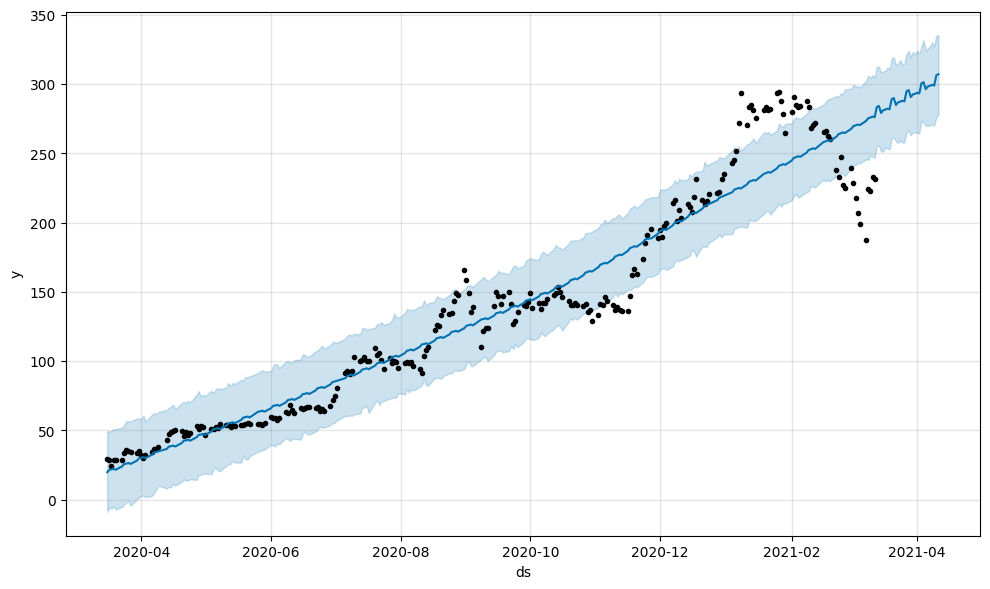

In [45]:
# pro.plot(predictions_results,xlabel="Date ------>",ylabel="Closing Price ------>")
fig_1 = pro.plot(predictions,xlabel="ds",ylabel="y")

c:\Users\amith\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



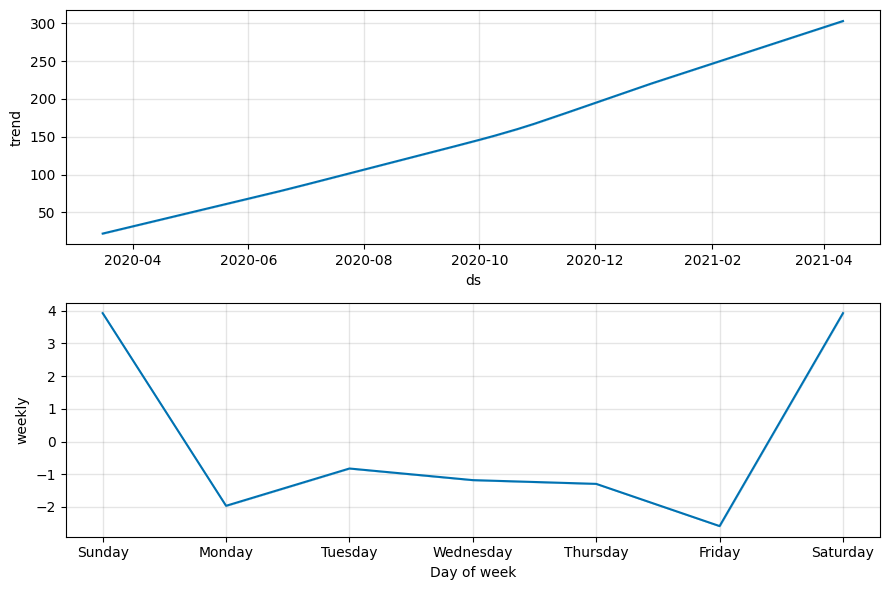

In [46]:
fig_2 = pro.plot_components(fcst=predictions)

In [51]:
predictions.to_csv("forecast.csv")